## MLP_Tensorflow_digits1_res

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random as r
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf


<Figure size 432x288 with 0 Axes>

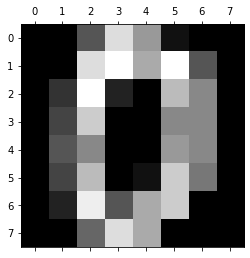

[[0]
 [1]
 [2]
 ...
 [8]
 [9]
 [8]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [2]:

#importa a base de dígitos em tupla

digits1 = load_digits(return_X_y=True)
# em digits1[0] : vetores da imagem
# em digits1[1] : classes reais das imagens (dígitos)
X=np.array(list(digits1[0]))
Y=np.array(list(digits1[1]))

plt.gray() 
plt.matshow(X[0].reshape((8,8))) 
plt.show() 




enc = OneHotEncoder()
YC=Y.copy()
YR=YC.reshape((-1,1))
print(YR)
enc.fit(YR)
YH=enc.transform(YR).toarray()
print(YH[0])



In [0]:
W = {'hidden': tf.Variable(tf.random_normal([64, 20])),
     'hidden_1': tf.Variable(tf.random_normal([20, 20])),
     'output': tf.Variable(tf.random_normal([20, 10]))}

    
b = {'hidden': tf.Variable(tf.random_normal([20])),
     'hidden_1': tf.Variable(tf.random_normal([20])),
     'output': tf.Variable(tf.random_normal([10]))}

In [0]:
xx = tf.placeholder('float', [None, 64])
yy = tf.placeholder('float', [None, 10])

def rede(xx,W,b):
  hidden = tf.nn.relu(tf.add(tf.matmul(xx, W['hidden']), b['hidden']))
  hidden_1 = tf.nn.relu(tf.add(tf.matmul(hidden, W['hidden_1']), b['hidden_1']))
  return tf.add(tf.matmul(hidden_1, W['output']), b['output'])

model=rede(xx,W,b)
    

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, YH, test_size=0.30, random_state=42)

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = y_train))
opt = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(loss)

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(20000):
        sess.run(opt,feed_dict = {xx: X_train, yy: y_train})
        if epoca%100==0:print(epoca,sess.run(loss,feed_dict={xx:X_train,yy:y_train}).mean())
    W_final, b_final = sess.run([W, b])
    ye_train=sess.run(tf.nn.softmax(model),feed_dict = {xx:X_train})
    ye_test=sess.run(tf.nn.softmax(model),feed_dict = {xx:X_test})
    


0 423.6897
100 4.718359
200 1.6369009
300 1.0599339
400 0.90298176
500 0.81392086
600 0.75608677
700 0.7181088
800 0.6855163
900 0.6563034
1000 0.6272301
1100 0.6014593
1200 0.58001685
1300 0.58265406
1400 0.5165345
1500 0.49439192
1600 0.4773865
1700 0.4635144
1800 0.45280594
1900 0.4408093
2000 0.42599067
2100 0.4181473
2200 0.40709525
2300 0.4010251
2400 0.39612368
2500 0.38791975
2600 0.38218507
2700 0.36761904
2800 0.3604392
2900 0.35105556
3000 0.34790832
3100 0.34474182
3200 0.33421925
3300 0.32638073
3400 0.32259613
3500 0.31897825
3600 0.3128853
3700 0.30996776
3800 0.3053139
3900 0.30209836
4000 0.30012697
4100 0.28800872
4200 0.27258128
4300 0.26898268
4400 0.2609388
4500 0.2551003
4600 0.25323853
4700 0.24996133
4800 0.24233848
4900 0.23570131
5000 0.23200169
5100 0.22983533
5200 0.22369447
5300 0.21608599
5400 0.21372482
5500 0.20932259
5600 0.20744978
5700 0.20488295
5800 0.20330107
5900 0.20686126
6000 0.19660275
6100 0.19486374
6200 0.19435914
6300 0.19091108
6400 0.188

In [0]:
ye_tr=np.array([np.argmax(y) for y in ye_train])
ye_ts=np.array([np.argmax(y) for y in ye_test])
yt=np.array([np.argmax(y) for y in y_train])
yts=np.array([np.argmax(y) for y in y_test])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ye_tr,yt),accuracy_score(ye_ts,yts)


(0.9960222752585521, 0.9018518518518519)